<a href="https://colab.research.google.com/github/timrocar/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [12]:
sample20 = df.sample(20, random_state=42)

sample200 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [13]:
sample20['ConvertedSalary'].mean()

55752.2

In [14]:
sample200['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the sample with a size of 200 as its confidence interval would be lower then that of a smaller (20) sample. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

When looking at one point estimate, no it does not. When comparing two point estimates pooling from different sample sizes, yes.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We can report our point estimates as ranges to account for the sampling error and it's confidence interval!

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [18]:
from scipy import stats
## establishing our function for calculating a confidence interval of .95
def confidence_interval(sampleset, confidence_level=.95):
  data = np.array(sampleset)
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)
  t = stats.t.ppf(1- ((1 - confidence_level) / 2), n-1)
  std_err = (s /np.sqrt(n))
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [19]:
#running our function on the smaller sample
confidence_interval(sample20['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [20]:
#running our function on the larger sample
confidence_interval(sample200['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval of .95 in this case means that if our standard error is larger, our confidence interval will be WIDER. 

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
## the mean of sample20 is 55752.2 , and the MoE is 19947.096 

In [21]:
## the mean of sample200 is 68551.255 , and the MoE is 7958.1961 

In [ ]:
## The margin of error represents the potential varience (both +-) of our means. This means in the example of sample 20, 
## the estimated sample mean may in fact be 19947 larger or smaller. 

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [22]:
CI20 = confidence_interval(sample20['ConvertedSalary'])
CI200 = confidence_interval(sample200['ConvertedSalary'])

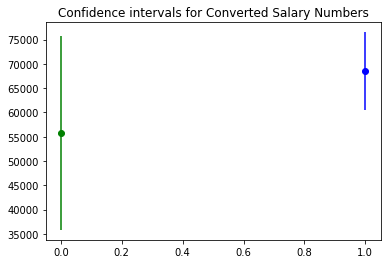

In [36]:
plt.errorbar(0, CI20[1], yerr=CI20[3], fmt ='go--')
plt.errorbar(1, CI200[1], yerr=CI200[3], fmt='bo')
plt.title ('Confidence intervals for Converted Salary Numbers')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

Text(0.5, 1.0, 'Confidence intervals for Converted Salary Numbers')

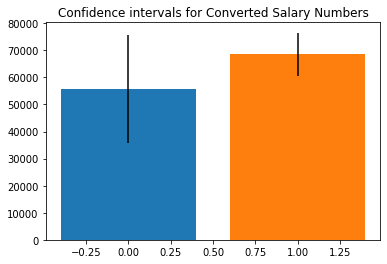

In [30]:
plt.bar(0, CI20[1], yerr=CI20[3])
plt.bar(1, CI200[1], yerr=CI200[3])
plt.title ('Confidence intervals for Converted Salary Numbers')

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [38]:
confidence_interval(df['ConvertedSalary'])

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

In [ ]:
## our estimates become much tighter. down to a margin of error of 2153, our population mean is actually quite higher then that of both of our data sets. 


**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is the measure of how closely our values are from a point estimate (in today's example our sample mean). The more precise we are, the lower our margin of error (potential variance). i.e confidence interval would be tighter. 
Accuracy is different in that our sample mean may be closer to the actual population mean, but if our sample data is highly varrying in its values, the potential for error is much higher. i.e : confidence interval would be much wider.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

the confidence interval is an ESTIMATE of the possible values of a population mean. 

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

### 1)

In [41]:
stretch = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values='?')

In [57]:
stretch.shape


(32561, 15)

In [43]:
confidence_interval(stretch['hours-per-week'])

(40.3033363616603, 40.437455852092995, 40.57157534252569, 0.13411949043269192)

In [50]:
stats.ttest_1samp(stretch['hours-per-week'], 40.58)

Ttest_1sampResult(statistic=-2.083155707861162, pvalue=0.03724481527194653)

In [52]:
stats.ttest_1samp(stretch['hours-per-week'], 40.569)

Ttest_1sampResult(statistic=-1.9224005093986234, pvalue=0.054564096043140074)

The boundaries of the confidence interval are the boundaries of statistical significance because as soon as our null hypthosis value falls outside of our confidence interval, we must reject our null hypothesis. 

Conversely, when our null hypothesis value falls within our confidence interval, we fail to reject our null hypothesis. 

###2)

In [53]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-07-15 22:18:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-07-15 22:18:05 (126 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [62]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
df = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")

df = df.replace({'y': 1, 'n': 0})
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [74]:
rep_exp = rep.dropna()
dem_exp = dem.dropna()

In [91]:
rep_stretch= rep_exp.drop(['party'], axis = 1)
rep_stretch.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [93]:
dem_stretch= dem_exp.drop(['party'], axis = 1)
dem_stretch.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [90]:
rep_stretch.apply(confidence_interval)

handicapped-infants     (0.13450349074958223, 0.21296296296296297, 0.2...
water-project           (0.3765480931771919, 0.4722222222222222, 0.567...
budget                  (0.08761355698812177, 0.1574074074074074, 0.22...
physician-fee-freeze    (0.9723853391655276, 0.9907407407407407, 1.009...
el-salvador-aid         (0.913434261310743, 0.9537037037037037, 0.9939...
religious-groups        (0.8059979340740583, 0.8703703703703703, 0.934...
anti-satellite-ban      (0.18358393802160433, 0.26851851851851855, 0.3...
aid-to-contras          (0.08006715123831286, 0.14814814814814814, 0.2...
mx-missile              (0.07261245914426012, 0.1388888888888889, 0.20...
immigration             (0.4793093369789436, 0.5740740740740741, 0.668...
synfuels                (0.08761355698812177, 0.1574074074074074, 0.22...
education               (0.7837708549420166, 0.8518518518518519, 0.919...
right-to-sue            (0.7727987421733069, 0.8425925925925926, 0.912...
crime                   (0.95564460958

In [94]:
dem_stretch.apply(confidence_interval)

handicapped-infants     (0.5008854514528094, 0.5887096774193549, 0.676...
water-project           (0.3627917755681809, 0.45161290322580644, 0.54...
budget                  (0.791966749899413, 0.8548387096774194, 0.9177...
physician-fee-freeze    (0.01008836071171925, 0.04838709677419355, 0.0...
el-salvador-aid         (0.13000591391201893, 0.20161290322580644, 0.2...
religious-groups        (0.3548790007497182, 0.4435483870967742, 0.532...
anti-satellite-ban      (0.6905800506734978, 0.7661290322580645, 0.841...
aid-to-contras          (0.7637035637475735, 0.8306451612903226, 0.897...
mx-missile              (0.7176672431336555, 0.7903225806451613, 0.862...
immigration             (0.44320399355877216, 0.532258064516129, 0.621...
synfuels                (0.41883613678222775, 0.5080645161290323, 0.59...
education               (0.06919940918552969, 0.12903225806451613, 0.1...
right-to-sue            (0.2093085202865504, 0.2903225806451613, 0.371...
crime                   (0.26182787733

In [100]:
rep_graph = rep_stretch.apply(confidence_interval)

In [101]:
dem_graph = dem_stretch.apply(confidence_interval)

In [99]:
rep_graph['water-project']

(0.3765480931771919,
 0.4722222222222222,
 0.5678963512672525,
 0.0956741290450303)